<a href="https://colab.research.google.com/github/gvanathip/NLP_CNN/blob/main/GenerateWordCloudWordCount_from_upload_TextFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Upload data file (.xlsx only)

In [39]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  df = pd.read_excel(fn)
  print(df)

Saving 65-food.xlsx to 65-food.xlsx
                                                Detail
0    ... SHIDA VITA-C  ชิดะ วิต้าซี วิตามินซีไฮโดส....
1    ... กลูต้าอาโมนิ ผิวสดใส ไม่โทรม ลดรอยดำ...อาโ...
2    ....Bio Cocoa/ Matcha/Tea malt/ Coffee mix khu...
3    ...“Peacha” ชาผอมลดพุง หอมสดชื่นอร่อย ครบจบในซ...
4    ...(1 ขวด) ZOM RICH ZU ส้มริชซึ วิตามินซี อาหา...
..                                                 ...
449  ...เอมิสกลูต้าเบอรี่...1 ปุก บรรจุ30แคปซูล...฿...
450  ...ใอเท่มใหม่ ที่ทุกคนต้องลอง‼️...มาในรูปแบบเจ...
451  ...ใอเท่มใหม่ ที่ทุกคนต้องลอง‼️...มาในรูปแบบเจ...
452  ...เฮอบาไลฟ์ นิวทริชั่น โปรตีน ดริ้งค์ มิกซ์ H...
453                                        Grand Total

[454 rows x 1 columns]


## Upload THAI font file (.ttf only)

http://www.f0nt.com/release/th-sarabun-new/

In [40]:
uploaded = files.upload()

Saving THSarabunNew.ttf to THSarabunNew.ttf


In [48]:
for fn in uploaded.keys():
  font_file = fn
print(font_file)

THSarabunNew.ttf


# Wait for processing

In [41]:
text = df[df.columns[0]].str.cat(sep=' ')

In [43]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from pythainlp.tokenize import word_tokenize
from wordcloud import WordCloud
from pythainlp.corpus import thai_stopwords
import matplotlib.pyplot as plt

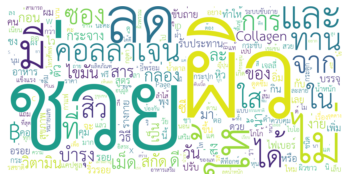

In [51]:
wordcloud = WordCloud(font_path=font_file,
                      stopwords = ' '.join(thai_stopwords()),
                      background_color="white",
                      width=2048, # กว้าง
                      height=1024, # ยาว
                      collocations=False,
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+"
                      ).generate(' '.join(word_tokenize(text)))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [66]:
word_count = pd.Series(word_tokenize(text)).value_counts().sort_values(ascending=False)
word_count = word_count.to_frame().reset_index().rename(columns={"index": "word", 0: "count"})

In [68]:
word_count.to_csv('word_count.csv')
files.download('word_count.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>